In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import random

from sklearn.model_selection import KFold

In [21]:
# learning_rate = 0.0000000027 # 这是目前很好的参数
# learning_rate = 0.0005 # 这是改进后较好的参数
learning_rate = 1
epochs = 2000
_lambda = 0.2
batch_size = 64
problem_size = 15

train_set_file = "./trainSet.csv"
test_set_file = "./testSet.csv"

In [3]:
def generate_batch(train_data, train_label, batch_size):
    iterations = math.ceil(len(train_data)/batch_size)
    for i in range(iterations):
#         print(train_data[i*batch_size:(i+1)*batch_size])
        yield (train_data[i*batch_size:(i+1)*batch_size], train_label[i*batch_size:(i+1)*batch_size])

In [4]:
def show_curve(ys, title):
    x = np.array(range(len(ys)))
    y = np.array(ys)
    plt.plot(x, y, c = 'b')
    plt.axis()
    plt.title("{} curve".format(title))
    plt.xlabel("epoch")
    plt.ylabel("{} value".format(title))
    plt.show()

In [5]:
x = 5
print(math.pow(2, x))

32.0


In [6]:
class LR_Model(object):
    def __init__(self, size):
        self.weight = np.random.randn(size)
        self.learning_r = 1
        self.temp_grad = 0
        self.iter = 1
        
    # 计算输出预测值，x是batchsize*32维的
    def forward(self, x):
#         print(np.dot(x, self.weight))
        return 1/(1+np.exp(-np.dot(x, self.weight)))
    
    # 使用gradient descent更新参数
    def backward(self, y_hat, x, y, i):
        #计算梯度：
        grad = (1-_lambda)*np.dot(y_hat-y, x)+_lambda*self.weight
        #更新：
#         self.weight = self.weight - learning_rate*self.learning_r*grad
        grad[grad > 0.1] = 0.1 # 阈值处理
        grad[grad < -0.1] = -0.1        
        self.weight = self.weight - (learning_rate/(math.pow(3, i/130))+0.000000000000001)*grad
#         self.weight = self.weight - (learning_rate*self.learning_r+0.00000000000000001)*grad
#         if (self.iter == i):
#             self.iter = self.iter + 1
#             self.temp_grad = 0.1*(np.dot(grad, grad)) + 0.9*self.temp_grad
#             self.learning_r = 1/np.sqrt(self.temp_grad)

In [7]:
# 根据validation set和train set做训练和预测
def train(train_set_data, train_set_label, val_set_data, val_set_label, num, size):
    aces = []
    val_aces = []
    model = LR_Model(size)
    for i in range(epochs):
        ac = 0
        val_ac = 0
        for index, (train_data_i, train_label_i) in enumerate(generate_batch(train_set_data, train_set_label, batch_size)):
            y_hat = model.forward(train_data_i)
            model.backward(y_hat, train_data_i, train_label_i, i+1)
            ac = ac + np.sum(np.round(y_hat) == train_label_i)
            
#         y_hat = model.forward(train_set_data)
#         model.backward(y_hat, train_set_data, train_set_label, i+1)
#         ac = np.sum(np.round(y_hat) == train_set_label)
#         print(ac)
        aces.append(ac/len(train_set_data))
        
        y_hat_val = model.forward(val_set_data)
        val_ac = np.sum(np.round(y_hat_val) == val_set_label)
        val_aces.append(val_ac/len(val_set_data))
        
        if i != 0 and i % 100 == 0:
            show_curve(aces, "{}th train".format(num))
            show_curve(val_aces, "{}th validation".format(num))
            print(val_ac)
    
    show_curve(aces, "{}th train".format(num))
    show_curve(val_aces, "{}th validation".format(num))
    
    return model
    

In [15]:
import random
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# 主函数
train_frame = pd.read_csv(train_set_file, encoding = "utf-8", header = None)
test_frame = pd.read_csv(test_set_file, encoding = "utf-8", header = None)

train_set = np.float64(train_frame.iloc[1:len(train_frame)+1, 0:33].values)
test_set = np.float64(test_frame.iloc[1:len(test_frame)+1, 0:32].values)

train_data, val_data, train_label, val_label = train_test_split(train_set[:, 0:32], train_set[:, 32], test_size = 0.1, 
                                                                random_state = random.randint(0, 100))

C:\Users\14735\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\14735\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
import numpy as np
import scipy as sc
# print sc.stats.pearsonr(a,b)
delete_line = []
for i in range(0, 32):
    for j in range(i+1, 32):
        pearson = sc.stats.pearsonr(np.float32(train_frame.iloc[1:len(train_frame)+1:,i].values), np.float32(train_frame.iloc[1:len(train_frame)+1:,j].values))
        if pearson[0] > 0.7:
            print('i:{}, j:{}, pearson:{}'.format(i, j, pearson))
            delete_line.append(j)

i:0, j:24, pearson:(0.72708213, 0.0)
i:1, j:9, pearson:(0.8245497, 0.0)
i:1, j:13, pearson:(0.7917233, 0.0)
i:1, j:14, pearson:(0.92927814, 0.0)
i:1, j:15, pearson:(0.9386956, 0.0)
i:1, j:18, pearson:(0.9631755, 0.0)
i:1, j:29, pearson:(1.0, 0.0)
i:1, j:30, pearson:(0.86542404, 0.0)
i:9, j:13, pearson:(0.9633382, 0.0)
i:9, j:14, pearson:(0.9158165, 0.0)
i:9, j:15, pearson:(0.8894931, 0.0)
i:9, j:18, pearson:(0.7935032, 0.0)
i:9, j:29, pearson:(0.8245498, 0.0)
i:9, j:30, pearson:(0.8570423, 0.0)
i:11, j:17, pearson:(0.78208214, 0.0)
i:11, j:19, pearson:(0.84288865, 0.0)
i:11, j:23, pearson:(0.84290487, 0.0)
i:11, j:26, pearson:(0.7820821, 0.0)
i:12, j:17, pearson:(0.7636099, 0.0)
i:12, j:26, pearson:(0.76360977, 0.0)
i:13, j:14, pearson:(0.8803602, 0.0)
i:13, j:15, pearson:(0.8545452, 0.0)
i:13, j:18, pearson:(0.82133317, 0.0)
i:13, j:29, pearson:(0.79172343, 0.0)
i:13, j:30, pearson:(0.82402396, 0.0)
i:14, j:15, pearson:(0.9766616, 0.0)
i:14, j:17, pearson:(0.7517027, 0.0)
i:14, j:18, 

In [17]:
delete_line = set(delete_line)
print(list(delete_line))

[9, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30]


In [18]:
train_data = np.delete(train_data, list(delete_line), axis=1)
val_data = np.delete(val_data, list(delete_line), axis=1)
test_set = np.delete(test_set, list(delete_line), axis=1)

In [19]:
# 数据预处理
sc = StandardScaler()
train_data = sc.fit_transform(train_data)
val_data = sc.fit_transform(val_data)
test_set = sc.fit_transform(test_set)


In [20]:
print(train_data.shape)

(180000, 15)


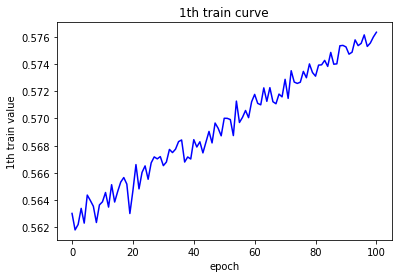

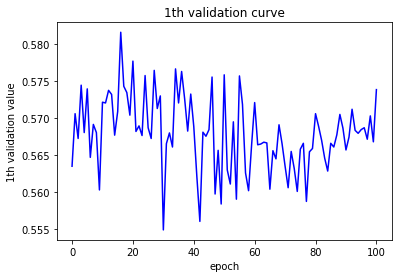

11476


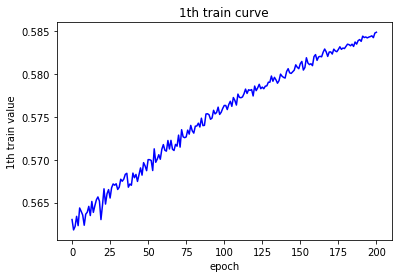

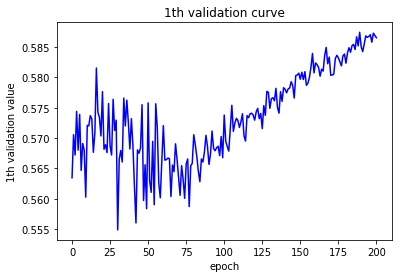

11731


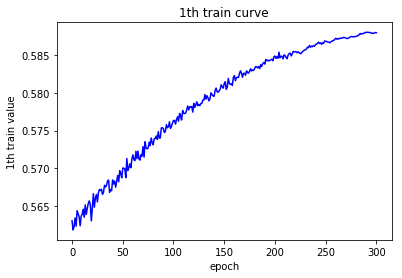

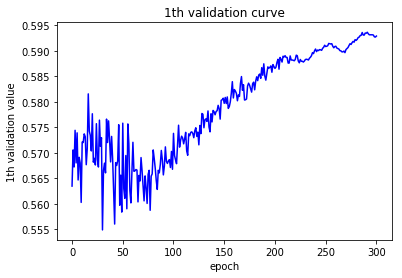

11858


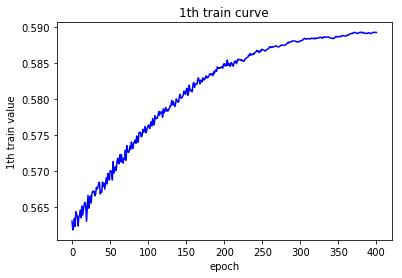

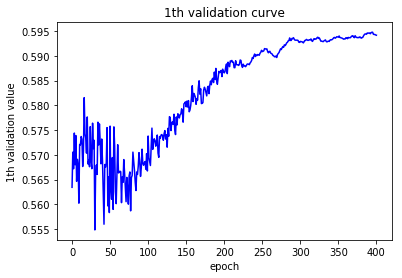

11883


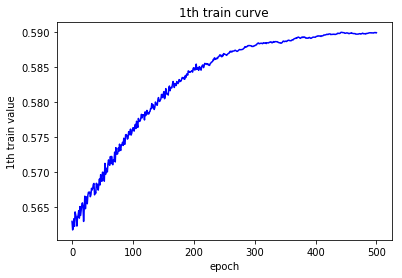

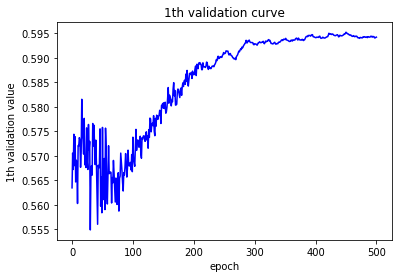

11885


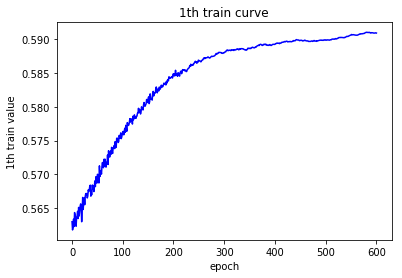

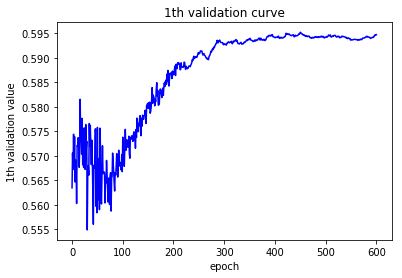

11895


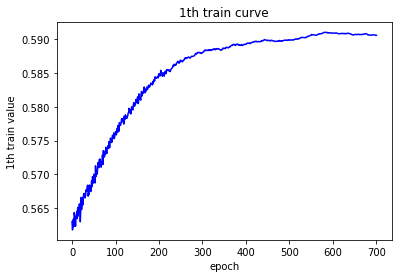

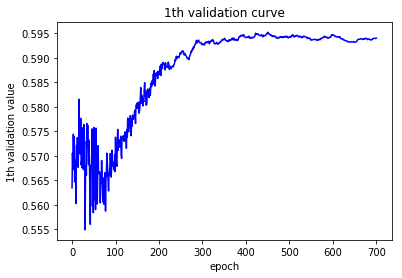

11881


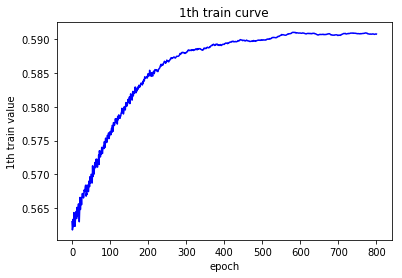

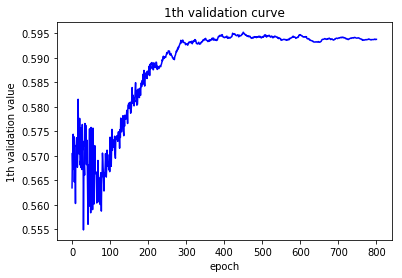

11876


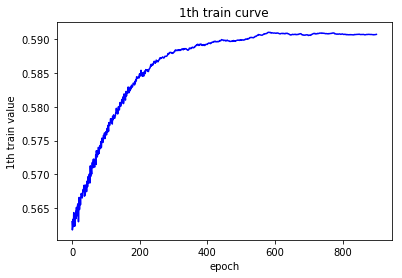

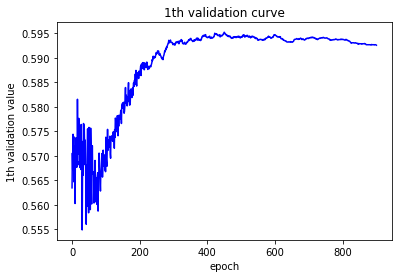

11852


KeyboardInterrupt: 

In [22]:
model = train(train_data, train_label, val_data, val_label, 1, problem_size)

为什么学习率变化导致np.dot(x, self.weight)变化？？？

In [142]:
y_hat = model.forward(test_set)
f = pd.DataFrame(data = {'Predicted':np.array(np.round(y_hat)).astype(int)}, index = np.arange(1, len(y_hat)+1))
f.to_csv('res.csv')

131.74
